In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [13]:
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
# combine test dataset and train dataset
df =pd.concat([train, test], axis=0)

In [14]:
# remove unknown
df_no_unknown = df[(df['job'] != 'unknown') & (df['education'] != 'unknown') & (df['marital'] != 'unknown') & (df['default'] != 'unknown') & (df['housing'] != 'unknown') & (df['loan'] != 'unknown')]
# filter previous success cases
df_prev_success = df_no_unknown[df_no_unknown['poutcome'] == 'success']

In [15]:
cust_features_transform = ['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact']

In [16]:
one_hot_df = df_prev_success['age'].reset_index(drop=True)
for feature in cust_features_transform:
    encoder = OneHotEncoder(sparse_output=False)
    feature_df = pd.DataFrame(encoder.fit_transform(df_prev_success[[feature]]),
                              columns=encoder.get_feature_names_out([feature])).reset_index(drop=True)
    one_hot_df = pd.concat([one_hot_df, feature_df], axis=1)

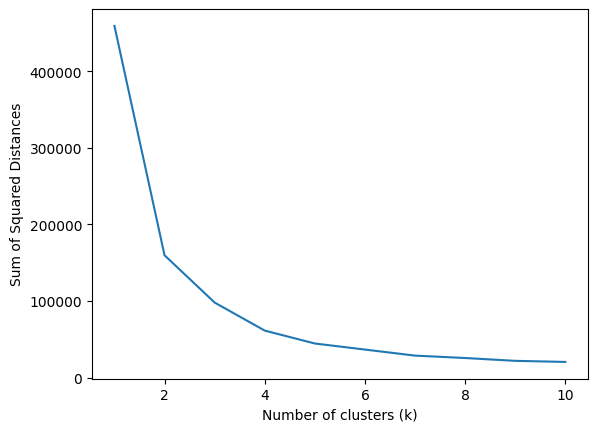

In [17]:
inertia = []
for nc in range(1,11):
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(one_hot_df)
    inertia.append(kmeans.inertia_)
interias = pd.DataFrame({'n_clusters': range(1, 11), 'inertia': inertia})

plot = interias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plot.legend().set_visible(False)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(one_hot_df)
memb = pd.DataFrame(kmeans.labels_, one_hot_df.index, columns=['Cluster'])

In [23]:
train_df = memb
train_df['default'] = df_prev_success['default'].map({'yes': True, 'no': False}).reset_index(drop=True)
train_df['loan'] = df_prev_success['loan'].map({'yes': True, 'no': False}).reset_index(drop=True)
train_df['housing'] = df_prev_success['housing'].map({'yes': True, 'no': False}).reset_index(drop=True)

In [24]:
cont_features_transform = ['month','day_of_week']

for feature in cont_features_transform:
    feature_df =  pd.get_dummies(df_prev_success[feature])
    train_df = pd.concat([train_df.reset_index(drop=True), feature_df.reset_index(drop=True)], axis=1)

In [25]:
numeric_X = df_prev_success[['campaign', 'pdays', 'previous']]
y = df_prev_success['duration']

In [26]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
numeric_X = pd.DataFrame(scaler.fit_transform(numeric_X), columns = numeric_X.columns)

In [27]:
Xnew = pd.concat([train_df, numeric_X], axis=1)
Xnew

,Cluster,default,loan,housing,apr,aug,dec,jul,jun,mar,...,oct,sep,fri,mon,thu,tue,wed,campaign,pdays,previous
0,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,-0.312462,-0.594625,0.603899
1,2,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,-0.312462,0.848889,1.114937
2,1,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,0.195260,-1.327293,-0.418177
3,0,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,0.195260,-0.844044,1.114937
4,1,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,1.718427,0.303284,1.114937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,2,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,0.195260,0.967363,1.625975
3375,1,False,True,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,-0.312462,1.026600,-1.440253
3376,1,False,False,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,0.449121,0.175457,-1.440253
3377,2,False,True,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,-0.312462,-1.158935,0.092861


In [28]:
# import train_test split
from sklearn.model_selection import train_test_split
# split data into train and test, 80% in training and 20% in testing
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.2,
                                                    random_state = 99)

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
coeff_df = pd.DataFrame(lin_reg.coef_, Xnew.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Cluster,7.100967e+01
default,-8.842196e+01
loan,4.110394e+01
housing,-4.262486e+01
apr,-1.681910e+16
aug,-1.681910e+16
dec,-1.681910e+16
jul,-1.681910e+16
jun,-1.681910e+16
mar,-1.681910e+16
